In [365]:
# Se importan las librerias y csv.
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("Dataset/Resultados__nicos_Saber_Pro.csv")

In [366]:
df

,PERIODO,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_PAIS_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,...,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
0,20183,EK201830011083,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,NaN,NaN,...,Si,Secundaria (Bachillerato) incompleta,NO OFICIAL - CORPORACIÓN,161,174.0,3.0,A2,139,161.0,128
1,20183,EK201830053875,CC,COLOMBIA,76.0,VALLE,76736.0,SEVILLA,NaN,NaN,...,Si,Secundaria (Bachillerato) incompleta,OFICIAL DEPARTAMENTAL,147,170.0,3.0,B1,171,188.0,182
2,20183,EK201830167993,CC,COLOMBIA,73.0,TOLIMA,73001.0,IBAGUÉ,1.730010e+11,73001.0,...,Si,No sabe,NO OFICIAL - CORPORACIÓN,142,77.0,1.0,A1,124,130.0,153
3,20183,EK201830168158,CC,COLOMBIA,68.0,SANTANDER,68081.0,BARRANCABERMEJA,1.680810e+11,68081.0,...,Si,Técnica o tecnológica completa,OFICIAL DEPARTAMENTAL,185,157.0,3.0,-A1,178,106.0,169
4,20183,EK201830164354,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,1.110010e+11,11001.0,...,Si,Educación profesional completa,OFICIAL DEPARTAMENTAL,114,132.0,2.0,A1,139,135.0,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991572,20212,EK202120268125,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,3.117690e+11,11001.0,...,Si,Educación profesional completa,NO OFICIAL - CORPORACIÓN,197,176.0,3.0,B2,184,223.0,191
991573,20212,EK202120230291,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,NaN,NaN,...,Si,Primaria incompleta,NO OFICIAL - CORPORACIÓN,113,84.0,1.0,A2,124,124.0,124
991574,20212,EK202120261846,CC,COLOMBIA,44.0,LA GUAJIRA,44430.0,MAICAO,1.444300e+11,44430.0,...,Si,Secundaria (Bachillerato) completa,OFICIAL DEPARTAMENTAL,115,117.0,2.0,A2,112,124.0,109
991575,20212,EK202120127825,CE,ESPAÑA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,NaN,NaN,...,Si,Educación profesional completa,NO OFICIAL - FUNDACIÓN,174,151.0,3.0,B2,173,224.0,182


# Data Cleaning 

In [367]:
# Eliminación de variables.

dq=df.drop(['ESTU_TIPODOCUMENTO','ESTU_PAIS_RESIDE','ESTU_COD_RESIDE_DEPTO','ESTU_DEPTO_RESIDE',
'ESTU_CODDANE_COLE_TERMINO','ESTU_COD_COLE_MCPIO_TERMINO','ESTU_COD_DEPTO_PRESENTACION','ESTU_INST_DEPARTAMENTO',
'ESTU_PRGM_DEPARTAMENTO','ESTU_PRGM_CODMUNICIPIO','ESTU_PRGM_MUNICIPIO','ESTU_NIVEL_PRGM_ACADEMICO' ,
'ESTU_METODO_PRGM','ESTU_DEPTO_PRESENTACION','ESTU_COD_MCPIO_PRESENTACION','ESTU_MCPIO_PRESENTACION',
'ESTU_SNIES_PRGMACADEMICO','ESTU_PRIVADO_LIBERTAD','ESTU_NACIONALIDAD','ESTU_ESTUDIANTE', 'ESTU_COLE_TERMINO',
'ESTU_ESTADOINVESTIGACION', 'ESTU_TIPODOCUMENTOSB11','INST_ORIGEN'], axis=1) 

In [368]:
# cantidad total de valores NaN.

dq.isnull().sum().sort_values(ascending=False)

FAMI_TIENEAUTOMOVIL               62751
FAMI_TIENELAVADORA                57231
FAMI_TIENECOMPUTADOR              54718
FAMI_ESTRATOVIVIENDA              45999
ESTU_HORASSEMANATRABAJA           44363
FAMI_TIENEINTERNET                38238
FAMI_EDUCACIONMADRE               33937
FAMI_EDUCACIONPADRE               33217
MOD_COMUNI_ESCRITA_DESEM          32436
ESTU_PAGOMATRICULABECA             9435
ESTU_PAGOMATRICULACREDITO          9359
ESTU_PAGOMATRICULAPROPIO           9311
ESTU_PAGOMATRICULAPADRES           9254
ESTU_VALORMATRICULAUNIVERSIDAD     9014
MOD_COMUNI_ESCRITA_PUNT            7466
ESTU_MCPIO_RESIDE                  2709
ESTU_COD_RESIDE_MCPIO              2709
ESTU_GENERO                         109
MOD_INGLES_DESEM                     71
MOD_INGLES_PUNT                      71
MOD_RAZONA_CUANTITAT_PUNT             0
MOD_LECTURA_CRITICA_PUNT              0
PERIODO                               0
ESTU_FECHANACIMIENTO                  0
ESTU_CONSECUTIVO                      0


In [369]:
# NaN para varibles categóricas.

dq[['ESTU_PAGOMATRICULABECA','ESTU_PAGOMATRICULACREDITO','ESTU_GENERO','ESTU_PAGOMATRICULAPADRES',
'ESTU_PAGOMATRICULAPROPIO','FAMI_EDUCACIONPADRE','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA','FAMI_ESTRATOVIVIENDA',
'FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_EDUCACIONMADRE','ESTU_VALORMATRICULAUNIVERSIDAD',
'ESTU_HORASSEMANATRABAJA']]=dq[['ESTU_PAGOMATRICULABECA','ESTU_PAGOMATRICULACREDITO','ESTU_GENERO',
'ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULAPROPIO','FAMI_EDUCACIONPADRE','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA',
'FAMI_ESTRATOVIVIENDA','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_EDUCACIONMADRE',
'ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA']].fillna('sin_dato')

In [370]:
# NaN para variables numéricas.

dq[['ESTU_COD_RESIDE_MCPIO','ESTU_MCPIO_RESIDE']]= dq[['ESTU_COD_RESIDE_MCPIO',
'ESTU_MCPIO_RESIDE']].fillna(0)


''' Para las variables MOD_COMUNI_ESCRITA_DESEM, MOD_COMUNI_ESCRITA_PUNT, MOD_INGLES_PUNT y MOD_INGLES_DESEM  
    se valida la cantidad de nulos '''

totalnan=dq.isnull().sum().sum()
print(f" La cantidad de NaN es: {totalnan} y corresponde al {round((100*(totalnan/len(dq))),1)} % de los datos")

 La cantidad de NaN es: 40044 y corresponde al 4.0 % de los datos


In [371]:
# Por representar una cantidad de NaN pequeña. Se eliminan estos registros.
dq=dq.dropna()

dq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959082 entries, 0 to 991576
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   PERIODO                         959082 non-null  int64  
 1   ESTU_CONSECUTIVO                959082 non-null  object 
 2   ESTU_COD_RESIDE_MCPIO           959082 non-null  float64
 3   ESTU_MCPIO_RESIDE               959082 non-null  object 
 4   INST_COD_INSTITUCION            959082 non-null  int64  
 5   INST_NOMBRE_INSTITUCION         959082 non-null  object 
 6   INST_CARACTER_ACADEMICO         959082 non-null  object 
 7   ESTU_NUCLEO_PREGRADO            959082 non-null  object 
 8   ESTU_INST_CODMUNICIPIO          959082 non-null  int64  
 9   ESTU_INST_MUNICIPIO             959082 non-null  object 
 10  ESTU_PRGM_ACADEMICO             959082 non-null  object 
 11  ESTU_VALORMATRICULAUNIVERSIDAD  959082 non-null  object 
 12  ESTU_PAGOMATRICU

In [372]:
# Se valida el tipo de datos, las variables con los puntajes de las notas se modifican a números enteros.

def cambia_int(col):
    dataframe=col.astype ( int )
    return dataframe

dq['MOD_INGLES_PUNT']=cambia_int(dq['MOD_INGLES_PUNT'])
dq['ESTU_COD_RESIDE_MCPIO']= cambia_int(dq['ESTU_COD_RESIDE_MCPIO'])
dq['MOD_COMUNI_ESCRITA_PUNT']=cambia_int(dq['MOD_COMUNI_ESCRITA_PUNT'])
dq['MOD_COMUNI_ESCRITA_DESEM']=cambia_int(dq['MOD_COMUNI_ESCRITA_DESEM'])

# Se Elimina el último carácter de la columna periodo. Para obtener el año de realización de la prueba.

dq['PERIODO']=dq['PERIODO']. astype ( str )
dq['PERIODO']=dq['PERIODO'].apply(lambda x: x[:-1])
dq['PERIODO']=cambia_int(dq['PERIODO'])

dq.rename(columns={'PERIODO':'AÑO', 'ESTU_COD_RESIDE_MCPIO':'Id_MCPIO','ESTU_CONSECUTIVO':'Id_ESTU',
'INST_COD_INSTITUCION':'Id_INSTITUCION', 'INST_NOMBRE_INSTITUCION':'INSTITUCION',
'ESTU_MCPIO_RESIDE':'MCPIO'} , inplace=True)

# Se genera una columna que muestre la edad del estudiante al realizar la prueba usando su fecha de nacimiento

separador_fecha = dq['ESTU_FECHANACIMIENTO'].str.split("/", n=2, expand=True)
dq.insert(2, 'ESTU_EDAD', separador_fecha[2])
dq['ESTU_EDAD']=cambia_int(dq['ESTU_EDAD'])
dq['ESTU_EDAD']= dq['AÑO']-dq['ESTU_EDAD']
dq=dq.drop(['ESTU_FECHANACIMIENTO'], axis=1) 

# Datos atípicos 

Se evidencia inconsistencias con la variable edad de los estudiantes. ESTU_EDAD. <br>
El dataset original presenta anomalías con la variable ESTU_FECHANACIMIENTO (fecha de nacimiento). Esto hace que existan estudiantes con años menores a 16 y mayores a 90.

In [373]:
'''Las pruebas saber pro se desarrollan en el ultimo año de pregrado de estudiantes universitarios. 
   En Colombia las carreras universitarias se cursan en 5 años, por lo cual la edad mínima promedio que puede
   tener un alumno en el desarrollo de las pruebas sera de 21- 23 años'''

max=dq["ESTU_EDAD"].max()
min=dq["ESTU_EDAD"].min()
print(f" Los datos muestran una edad mínima: {min}, edad máxima: {max}.")
print("_____")

# Se calcula la cantidad de atípicos

a=len(dq[dq["ESTU_EDAD"]<21])
b=len(dq[dq["ESTU_EDAD"]>=40])
print(f" Estudiantes menores a 21 años: {a} | Estudiantes mayores a 40 años: {b} \n Un total de: {a+b} datos atípicos.")
print(f" Esto corresponde al {round(100*((a+b)/len(dq)),1)} % de todos los datos")
print("_____")

dq["ESTU_EDAD"].value_counts()

 Los datos muestran una edad mínima: 0, edad máxima: 2017.
_____
 Estudiantes menores a 21 años: 32627 | Estudiantes mayores a 40 años: 50627 
 Un total de: 83254 datos atípicos.
 Esto corresponde al 8.7 % de todos los datos
_____


22      158192
23      126815
21      111525
24       94595
25       69512
         ...  
143          1
1990         1
87           1
148          1
1026         1
Name: ESTU_EDAD, Length: 150, dtype: int64

In [374]:
'''Teniendo en cuenta que los outliers solo corresponden al 9% de la totalidad de los datos. 
   Se da formato de 23 años para todos registros que sean menores a 21. Mientras que los atípicos mayores a 40, 
   se da formato de manera aleatoria en los valores de mayor frecuencia.'''

import random

# Outliers menor o igual a 21

dq["ESTU_EDAD"]=dq["ESTU_EDAD"].apply(lambda x: 23 if 0<= x <= 21  else x)

# Outliers mayor o igual a 40

dq["ESTU_EDAD"]=dq["ESTU_EDAD"].apply(lambda x: random.randint(21, 26) if x >= 40 else x)

In [375]:
dq.head(2)

,AÑO,Id_ESTU,ESTU_EDAD,Id_MCPIO,MCPIO,Id_INSTITUCION,INSTITUCION,INST_CARACTER_ACADEMICO,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
0,2018,EK201830011083,23,11001,BOGOTÁ D.C.,2834,UNIVERSITARIA AGUSTINIANA- UNIAGUSTINIANA-BOGO...,INSTITUCIÓN UNIVERSITARIA,ADMINISTRACIÓN,11001,...,Si,Si,Secundaria (Bachillerato) incompleta,161,174,3,A2,139,161,128
1,2018,EK201830053875,23,76736,SEVILLA,1203,UNIVERSIDAD DEL VALLE-CALI,UNIVERSIDAD,CONTADURÍA PUBLICA,76001,...,Si,Si,Secundaria (Bachillerato) incompleta,147,170,3,B1,171,188,182


In [376]:
# Se establece una agrupación con un rango de edad 

# Se crea nueva columna

dq["ESTU_EDAD1"]=dq["ESTU_EDAD"].apply(lambda x: "21 a 25" if 21<= x <= 25  else("26 a 33"if 26<= x<=33 
else("21 a 25"if 33<=x<=40 else x)))

# Se elimina la anterior
dq.drop(["ESTU_EDAD"], axis=1, inplace=True)
dq.rename(columns={'ESTU_EDAD1':'ESTU_EDAD'}, inplace=True)


Se grafican las distribuciones de las variables que tienen el puntaje de las pruebas. MOD_RAZONA_CUANTITAT_PUNT, MOD_COMUNI_ESCRITA_PUNT, MOD_LECTURA_CRITICA_PUNT, MOD_COMPETEN_CIUDADA_PUNT, MOD_INGLES_PUNT <br>

Las pruebas tienen 300 preguntas para cada modalidad. El puntaje representa la cantidad de preguntas acertadas por los estudiantes.

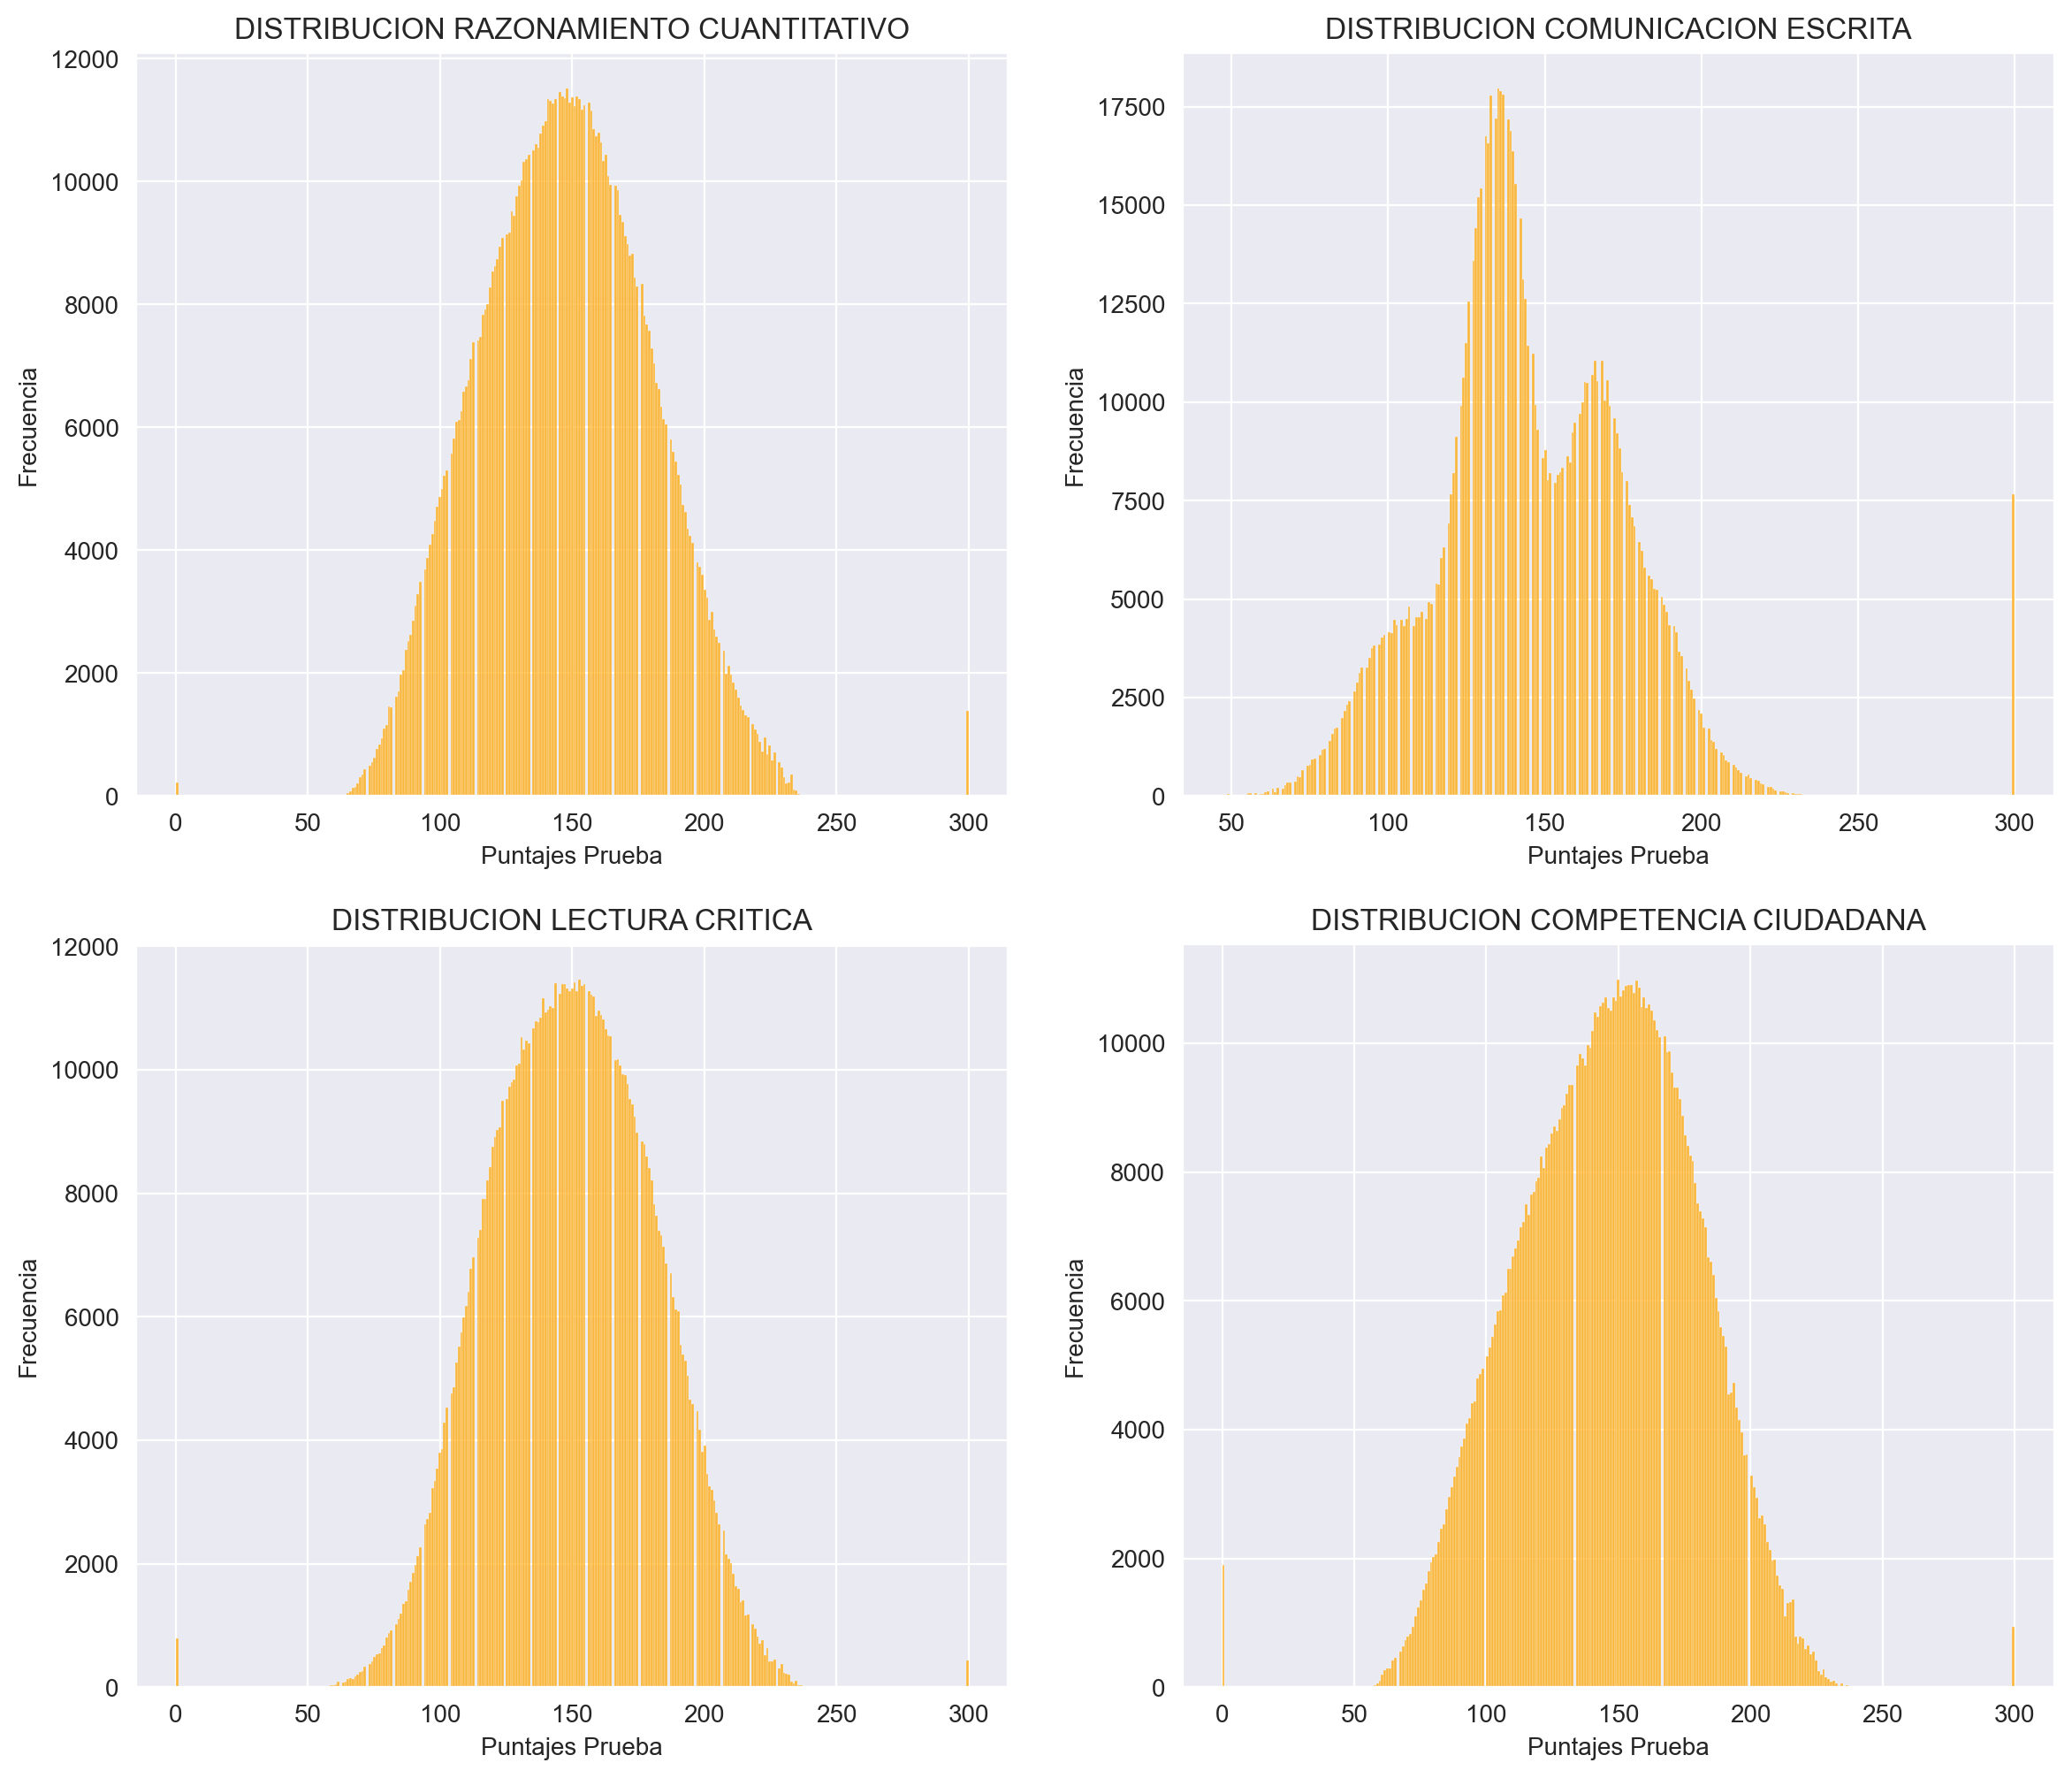

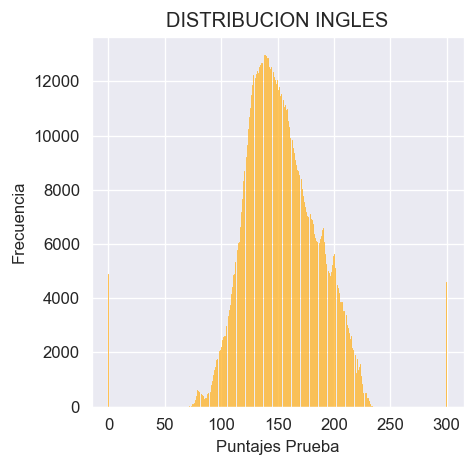

In [377]:
# Gráfica de la distribución de los puntajes.


sns.set_style("darkgrid") # Formato para el Backgound del grafico.

# Se crean ejes segmentados, para las primeras 4 gráficas.

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 12), dpi=200)

sns.histplot(data=dq,x='MOD_RAZONA_CUANTITAT_PUNT',color="orange",ax=ax[0,0]).set(title="DISTRIBUCION RAZONAMIENTO CUANTITATIVO",
xlabel="Puntajes Prueba",ylabel="Frecuencia")

sns.histplot(data=dq,x='MOD_COMUNI_ESCRITA_PUNT',color="orange",ax=ax[0,1]).set(title="DISTRIBUCION COMUNICACION ESCRITA",
xlabel="Puntajes Prueba", ylabel="Frecuencia")

sns.histplot(data=dq,x='MOD_LECTURA_CRITICA_PUNT',color="orange",ax=ax[1,0]).set(title="DISTRIBUCION LECTURA CRITICA",
xlabel="Puntajes Prueba", ylabel="Frecuencia")

sns.histplot(data=dq,x='MOD_COMPETEN_CIUDADA_PUNT',color="orange",ax=ax[1,1]).set(title="DISTRIBUCION COMPETENCIA CIUDADANA",
xlabel="Puntajes Prueba",ylabel="Frecuencia")

# Ultima gráfica.

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4), dpi=120)
sns.histplot(data=dq, x='MOD_INGLES_PUNT', color="orange" ).set( title= "DISTRIBUCION INGLES", xlabel = "Puntajes Prueba"
,ylabel="Frecuencia" )  
plt.show()


In [378]:
# Aplicación de tres sigmas para determinacón de outliers.

def outliers(dq):
    sample = dq.describe().T
    sample['median'] = dq.median()
    sample['outlier_max']= round(dq.mean() +( 3 *dq.std()))
    sample['outlier_min']= round(dq.mean() -( 3 *dq.std()))
    #Reordenamos los índices
    sample = sample.iloc[:,[0,1,8,2,3,4,5,6,7,9,10]]
    return(sample)

outliers(dq[['MOD_RAZONA_CUANTITAT_PUNT','MOD_COMUNI_ESCRITA_PUNT','MOD_LECTURA_CRITICA_PUNT',
'MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_PUNT',]])   

,count,mean,median,std,min,25%,50%,75%,max,outlier_max,outlier_min
MOD_RAZONA_CUANTITAT_PUNT,959082.0,147.608977,147.0,32.094890,0.0,125.0,147.0,170.0,300.0,244.0,51.0
MOD_COMUNI_ESCRITA_PUNT,959082.0,145.415547,142.0,31.533675,47.0,127.0,142.0,166.0,300.0,240.0,51.0
MOD_LECTURA_CRITICA_PUNT,959082.0,149.662598,150.0,30.884142,0.0,127.0,150.0,172.0,300.0,242.0,57.0
MOD_COMPETEN_CIUDADA_PUNT,959082.0,145.662284,147.0,33.571110,0.0,122.0,147.0,170.0,300.0,246.0,45.0
MOD_INGLES_PUNT,959082.0,153.626617,150.0,33.300381,0.0,131.0,150.0,175.0,300.0,254.0,54.0


Se analiza los valores atípicos con puntajes de prueba menores al límite inferior outlier_min y los puntajes que obtuvieron la máxima calificación (300).


In [379]:
# Contamos los valores atípicos por debajo del límite inferior.  

out_razona_cua=len(dq[dq['MOD_RAZONA_CUANTITAT_PUNT']<= 51])
out_comu_escrt=len(dq[dq['MOD_COMUNI_ESCRITA_PUNT']<= 51])
out_lect_crit=len(dq[dq['MOD_LECTURA_CRITICA_PUNT']<=57])
out_compt_ciu=len(dq[dq['MOD_COMPETEN_CIUDADA_PUNT']<=45])
out_ingles=len(dq[dq['MOD_INGLES_PUNT']<= 54])
total_out=out_razona_cua+out_compt_ciu+out_comu_escrt+out_lect_crit+out_ingles

print(f" Los outliers inferiores al límite mínimo de 3 sigma en las pruebas son: \n \n razonamiento cuantitativo: {out_razona_cua} \n comunicación escrita: {out_comu_escrt} \n lectura crítica:{out_lect_crit} \n competencia ciudadana: {out_compt_ciu}\n inglés: {out_ingles}\n ") 
print(f" Total outliers: {total_out} y corresponde al {round(100*(total_out/len(dq)),1)}% de los datos.")
print("_____")

# Contamos los valores que alzanzaron el puntaje máximo de las pruebas.

out_razona_cua=len(dq[dq['MOD_RAZONA_CUANTITAT_PUNT']== 300])
out_comu_escrt=len(dq[dq['MOD_COMUNI_ESCRITA_PUNT']== 300])
out_lect_crit=len(dq[dq['MOD_LECTURA_CRITICA_PUNT']== 300])
out_compt_ciu=len(dq[dq['MOD_COMPETEN_CIUDADA_PUNT']==300])
out_ingles=len(dq[dq['MOD_INGLES_PUNT']== 300])
total_out=out_razona_cua+out_compt_ciu+out_comu_escrt+out_lect_crit+out_ingles


print(f" Los datos de estudiantes con calificación máxima de 300 pts en las pruebas: \n \n razonamiento cuantitativo: {out_razona_cua} \n comunicación escrita: {out_comu_escrt} \n lectura crítica:{out_lect_crit} \n competencia ciudadana: {out_compt_ciu}\n inglés: {out_ingles}\n ") 
print(f" Total outliers: {total_out} y corresponde al {round(100*(total_out/len(dq)),1)}% de los datos.")

'''Se concluye que el número total de outliers no representa alguna incidencia en la calidad de los datos. 
   Por tanto, no se realiza alguna modificación '''

 Los outliers inferiores al límite mínimo de 3 sigma en las pruebas son: 
 
 razonamiento cuantitativo: 215 
 comunicación escrita: 59 
 lectura crítica:812 
 competencia ciudadana: 1893
 inglés: 4884
 
 Total outliers: 7863 y corresponde al 0.8% de los datos.
_____
 Los datos de estudiantes con calificación máxima de 300 pts en las pruebas: 
 
 razonamiento cuantitativo: 1386 
 comunicación escrita: 7655 
 lectura crítica:441 
 competencia ciudadana: 936
 inglés: 4606
 
 Total outliers: 15024 y corresponde al 1.6% de los datos.


'Se concluye que el número total de outliers no representa alguna incidencia en la calidad de los datos. \n   Por tanto, no se realiza alguna modificación '

# Interpretación de los datos


Las variables del dataframe que contienen la información de los puntajes de las pruebas **MOD_RAZONA_CUANTITAT_PUNT, MOD_COMUNI_ESCRITA_PUNT,  MOD_LECTURA_CRITICA_PUNT, MOD_COMPETEN_CIUDADA_PUNT,** y **MOD_INGLES_PUNT**. Representan las competencias de **Razonamiento Cuantitativo, Comunicación Escrita, Lectura critica, Competencia Ciudadana** e **Inglés**.<br>


Para evalúar las competencias mencionadas se implementa el desempeño numérico que establece el Icfes. De 1 a 4 (*siendo 1 el más bajo*).Para el desempeño en el área de ingles es  -A1, A1, A2, B1 hasta B2 (*siendo -A1 el más bajo*) y numericamente de 0.5 a 4 (*siendo 0.5 el más bajo*) como plantea la relación a continuacíon.
 <br> 
 

| **Razonamiento cuantitativo,  lectura crítica  competencia ciudadana** |               |        **Inglés**       |               |     |
|:----------------------------------------------------------------------:|:-------------:|:-----------------------:|:-------------:|:---:|
|                         **Preguntas Correctas**                        | **Desempeño** | **Preguntas Correctas** | **Desempeño** |     |
|                                 185-300                                |       4       |         200-300         |       B2      |  4  |
|                                 150-184                                |       3       |         180-199         |       B1      |  3  |
|                                 116-149                                |       2       |         146-179         |       A2      |  2  |
|                                  0-115                                 |       1       |         123-145         |       A1      |  1  |
|                                                                        |               |          0-122          |      -A1      | 0.5 |

*[fuente](https://www.icfes.gov.co/)*

In [380]:
# Conforme a las tablas establecidas:

# Se crean las variables notas de desempeño para Razonamiento cuantitativo, Lectura crítica y Competencia ciudadana. 

def notas_desemp(col):
    sample=col.apply(lambda x: 0 if x < 0 else(1 if 0 >= x <= 115 else(2 if 116 <= x <= 149 else (3 if 150 <= x <= 183
    else(4)))))
    return sample

dq['MOD_RAZONA_CUANTITAT_DESEM']= notas_desemp(dq['MOD_RAZONA_CUANTITAT_PUNT'])
dq['MOD_LECTURA_CRITICA_DESEM']= notas_desemp(dq['MOD_LECTURA_CRITICA_PUNT'])
dq['MOD_COMPETEN_CIUDADA_DESEM']= notas_desemp(dq['MOD_COMPETEN_CIUDADA_PUNT'])

# Variables para las notas de desempeño Inglés

dq['MOD_INGLES_DESEM2'] = dq['MOD_INGLES_PUNT'].apply(lambda x:0 if x <0 else(0.5 if 0 >= x <= 122 else(1 
if 123 <= x <= 145 else (2 if 146 <= x <= 170 else(3 if 171<=x<=199 else(4) )))))

Se divide y exporta el dataframe. Para desarrollar una base de datos con modelo de entidad-relacional sql  []

In [381]:
# Se crea tabla estudiantes

estudiantes= dq.drop(['MCPIO','INSTITUCION','INST_CARACTER_ACADEMICO','ESTU_INST_CODMUNICIPIO',
'ESTU_INST_MUNICIPIO','MOD_RAZONA_CUANTITAT_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_COMPETEN_CIUDADA_PUNT',
'MOD_INGLES_PUNT','MOD_INGLES_DESEM','MOD_COMUNI_ESCRITA_PUNT','ESTU_VALORMATRICULAUNIVERSIDAD',
'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO', 'ESTU_HORASSEMANATRABAJA','ESTU_PAGOMATRICULAPADRES',
'ESTU_PAGOMATRICULAPROPIO', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENELAVADORA',
'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONMADRE'], axis=1)

# Se crea tabla de aspectos socioeconomicos del Estudiante.

socioecono= dq[['Id_ESTU','ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO',
'ESTU_PAGOMATRICULAPADRES', 'ESTU_PAGOMATRICULAPROPIO', 'ESTU_HORASSEMANATRABAJA' ,'FAMI_EDUCACIONMADRE',
'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENELAVADORA', 
 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET']] 

#  Se crea tabla puntajes

puntaje=dq[[ 'Id_ESTU','MOD_RAZONA_CUANTITAT_PUNT','MOD_COMUNI_ESCRITA_PUNT',
'MOD_LECTURA_CRITICA_PUNT','MOD_INGLES_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_DESEM']]

# Instituciones

instituciones=dq[['Id_INSTITUCION','INSTITUCION','INST_CARACTER_ACADEMICO','ESTU_INST_CODMUNICIPIO','ESTU_INST_MUNICIPIO']]
instituciones=instituciones.rename({'ESTU_INST_CODMUNICIPIO':'IdMCPIO'}, axis=1)
instituciones=instituciones.drop(['ESTU_INST_MUNICIPIO'], axis=1)

# se exportan los datos

# puntaje.to_csv("DataBase/puntaje.csv",index=False)
# instituciones.to_csv("DataBase/instituciones.csv",index=False)
# estudiantes.to_csv("DataBase/estudiantes.csv",index=False)
#socioecono.to_json("DataBase/socieconomia.csv",index=False)


Se crea y analiza el dataframe estu_EDA, este se emplea para continuar con el desarrollo del EDA


In [382]:
estu_eda= dq.drop(['MCPIO','INSTITUCION','INST_CARACTER_ACADEMICO','ESTU_INST_CODMUNICIPIO',
'ESTU_INST_MUNICIPIO','MOD_RAZONA_CUANTITAT_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_COMPETEN_CIUDADA_PUNT',
'MOD_INGLES_PUNT','MOD_INGLES_DESEM','MOD_COMUNI_ESCRITA_PUNT'], axis=1)

estu_eda.head(5)

,AÑO,Id_ESTU,Id_MCPIO,Id_INSTITUCION,ESTU_NUCLEO_PREGRADO,ESTU_PRGM_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_HORASSEMANATRABAJA,...,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,MOD_COMUNI_ESCRITA_DESEM,ESTU_EDAD,MOD_RAZONA_CUANTITAT_DESEM,MOD_LECTURA_CRITICA_DESEM,MOD_COMPETEN_CIUDADA_DESEM,MOD_INGLES_DESEM2
0,2018,EK201830011083,11001,2834,ADMINISTRACIÓN,HOTELERIA Y TURISMO,Entre 2.5 millones y menos de 4 millones,No,No,Entre 11 y 20 horas,...,Estrato 2,Si,Si,Secundaria (Bachillerato) incompleta,3,21 a 25,3,2,2,2.0
1,2018,EK201830053875,76736,1203,CONTADURÍA PUBLICA,CONTADURIA PUBLICA,Menos de 500 mil,No,No,Entre 21 y 30 horas,...,Estrato 2,Si,Si,Secundaria (Bachillerato) incompleta,3,21 a 25,2,3,3,3.0
2,2018,EK201830167993,73001,2829,CONTADURÍA PUBLICA,CONTADURÍA PÚBLICA,Entre 1 millón y menos de 2.5 millones,No,No,Más de 30 horas,...,Estrato 2,Si,Si,No sabe,1,21 a 25,2,2,3,1.0
3,2018,EK201830168158,68081,2207,"INGENIERÍA AMBIENTAL, SANITARIA Y AFINES",INGENIERIA AMBIENTAL Y DE SANEAMIENTO,Entre 500 mil y menos de 1 millón,No,No,0,...,Estrato 2,Si,Si,Técnica o tecnológica completa,3,21 a 25,4,3,3,4.0
4,2018,EK201830164354,11001,1208,"BIBLIOTECOLOGÍA, OTROS DE CIENCIAS SOCIALES Y ...",CIENCIAS DE LA INFORMACION Y LA DOCUMENTACION,Entre 500 mil y menos de 1 millón,No,No,Entre 21 y 30 horas,...,Estrato 3,Si,Si,Educación profesional completa,2,26 a 33,4,2,2,1.0


In [434]:
# Se divide el dataframe para graficar las variables

estu_cat = estu_eda.select_dtypes('O')
estu_num= estu_eda.select_dtypes('number')

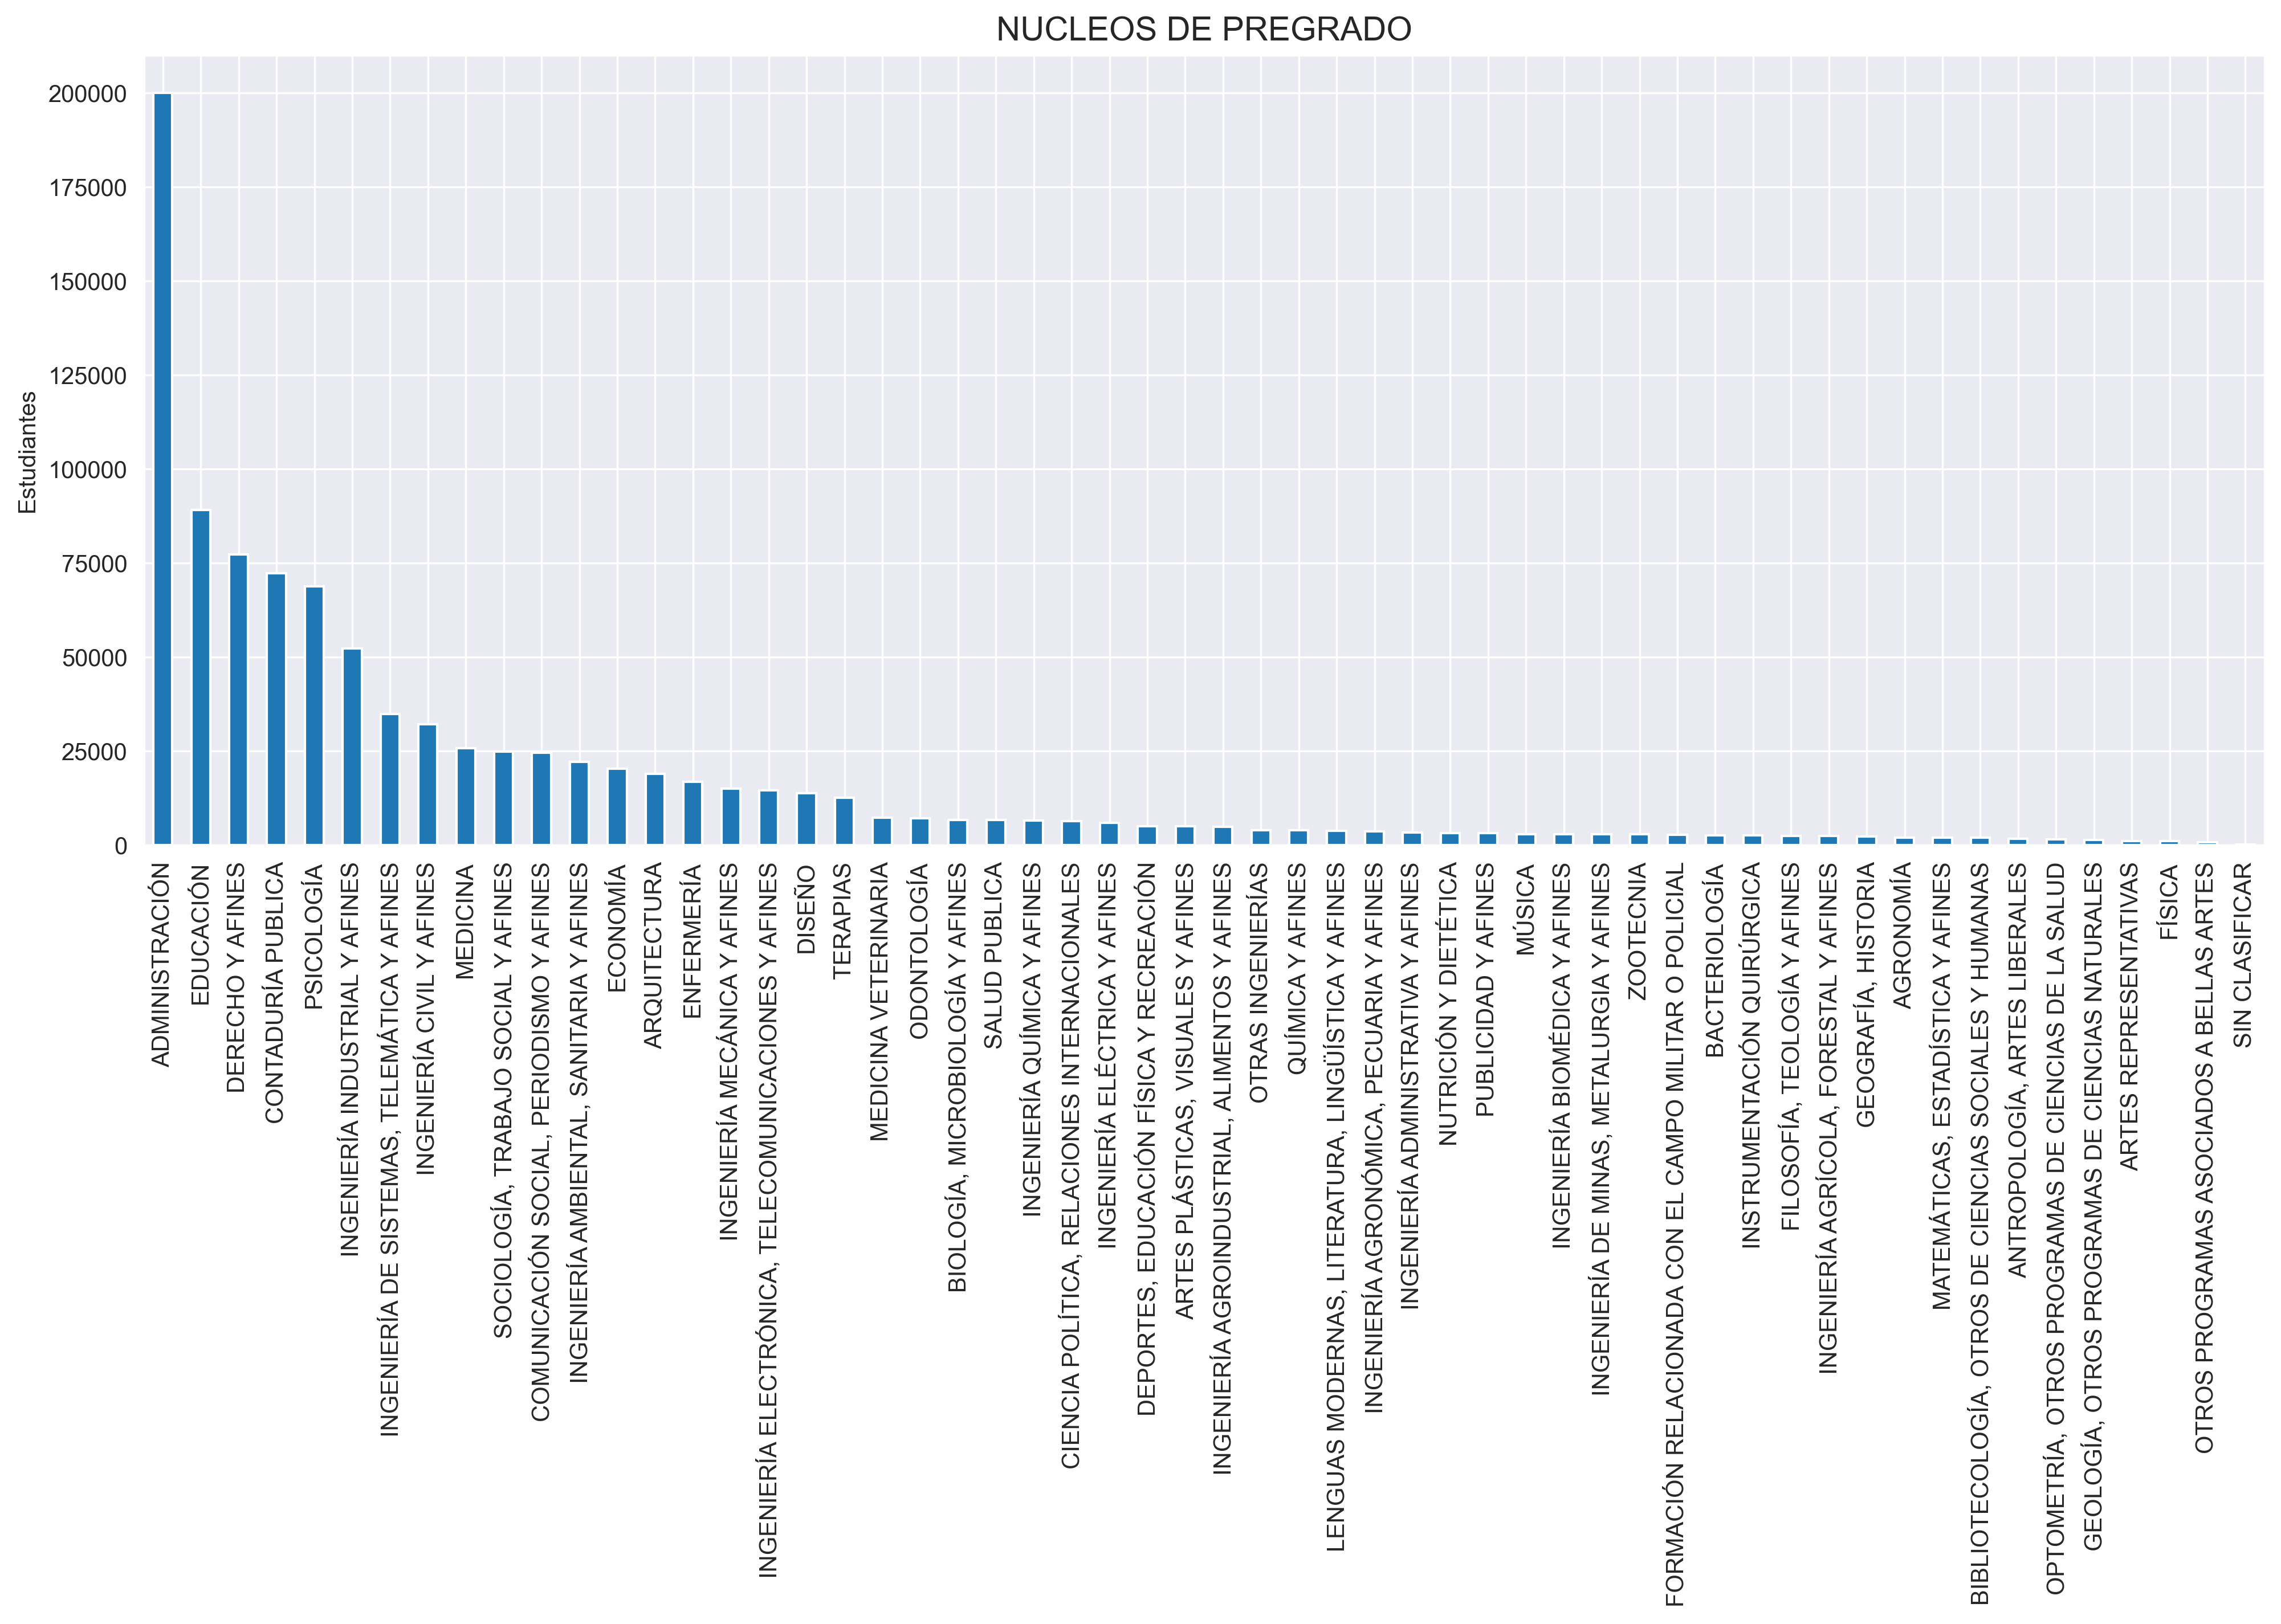

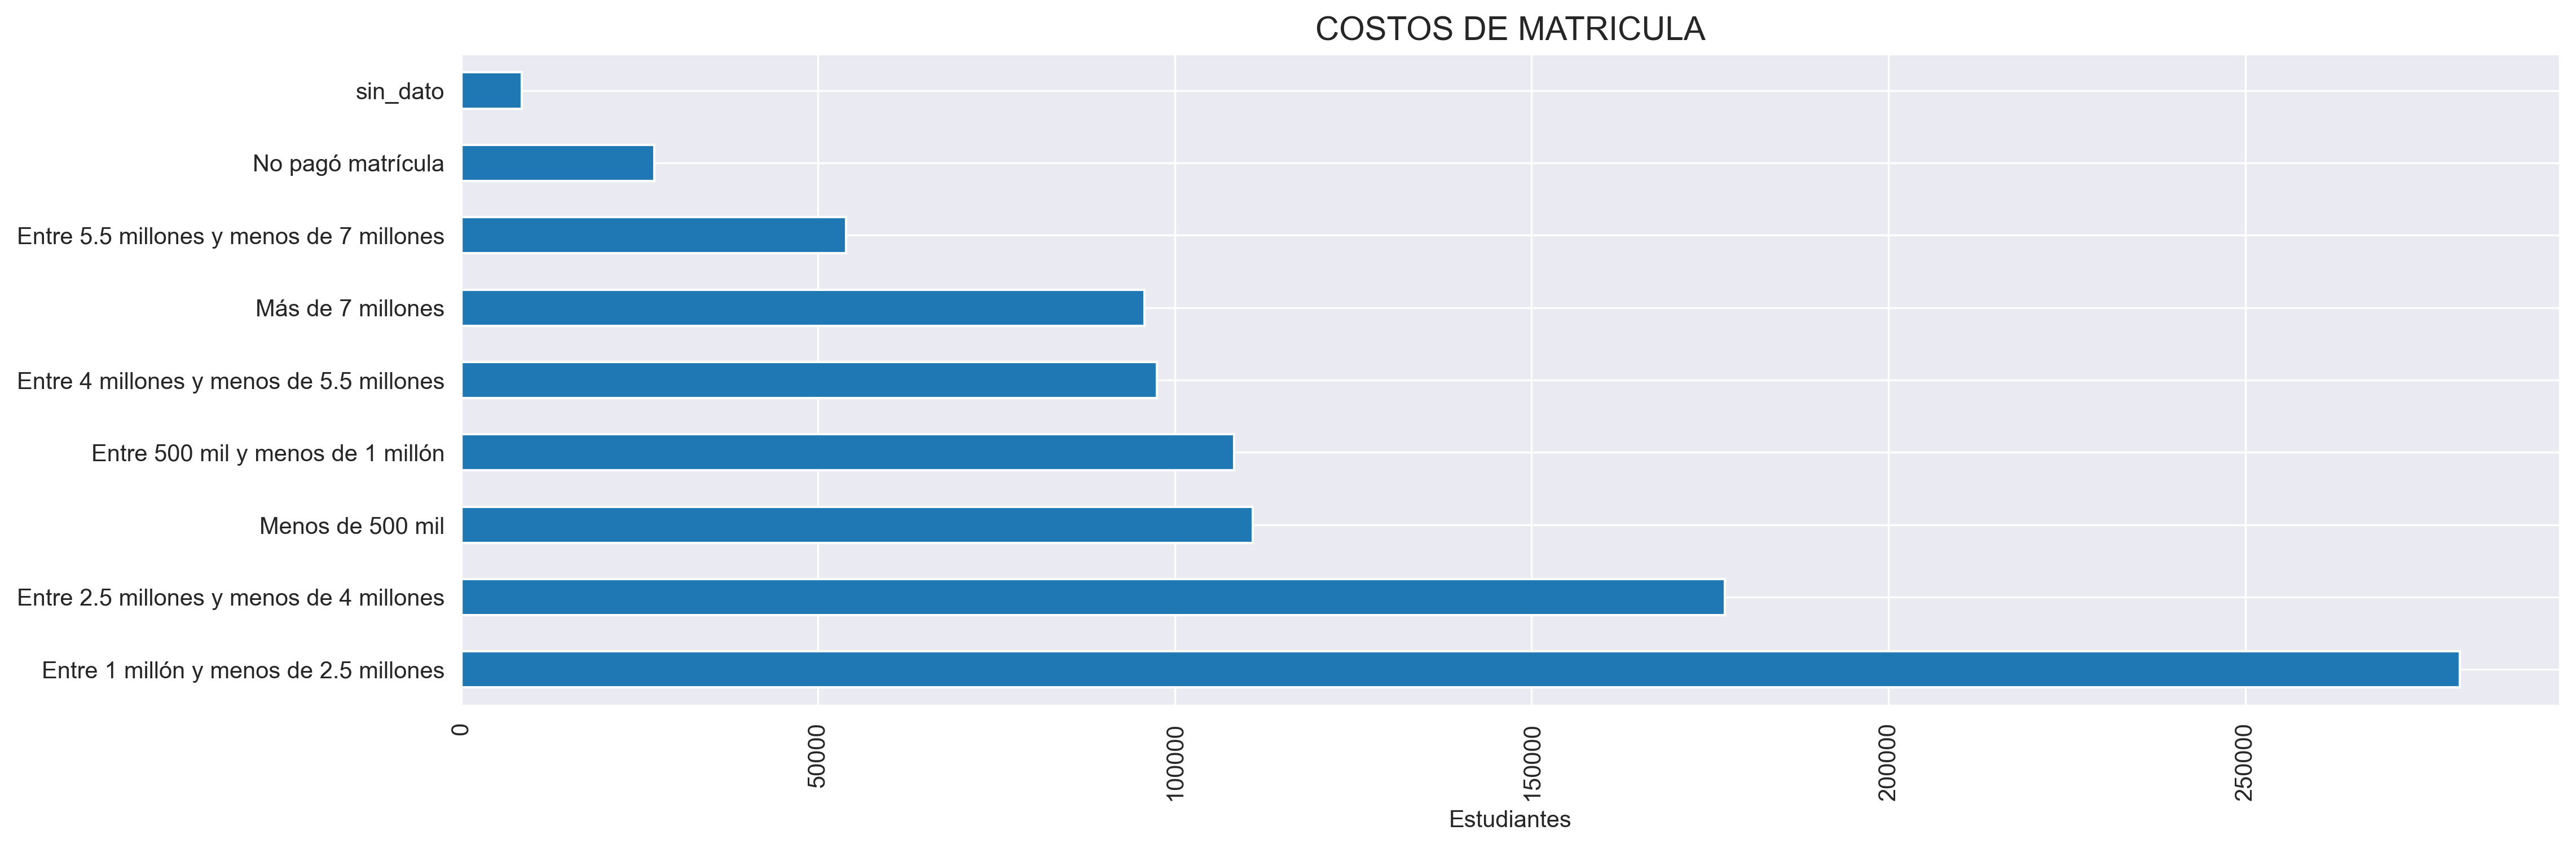

In [446]:
# Graficas para variables Categóricas

estu_cat_graf = estu_cat

# Programas académicos 

f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 6),dpi=300)
estu_cat_graf['ESTU_NUCLEO_PREGRADO'].value_counts().plot.bar(rot=0)
plt.xticks(rotation=90)
plt.ylabel('Estudiantes') 
plt.title("NUCLEOS DE PREGRADO", fontsize = 14 )

# Costos de matrícula

f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 5),dpi=300)
estu_cat_graf['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts().plot.barh (rot=0)
plt.xticks(rotation=90)
plt.xlabel('Estudiantes') 
plt.title("COSTOS DE MATRICULA", fontsize = 14)
plt.show()



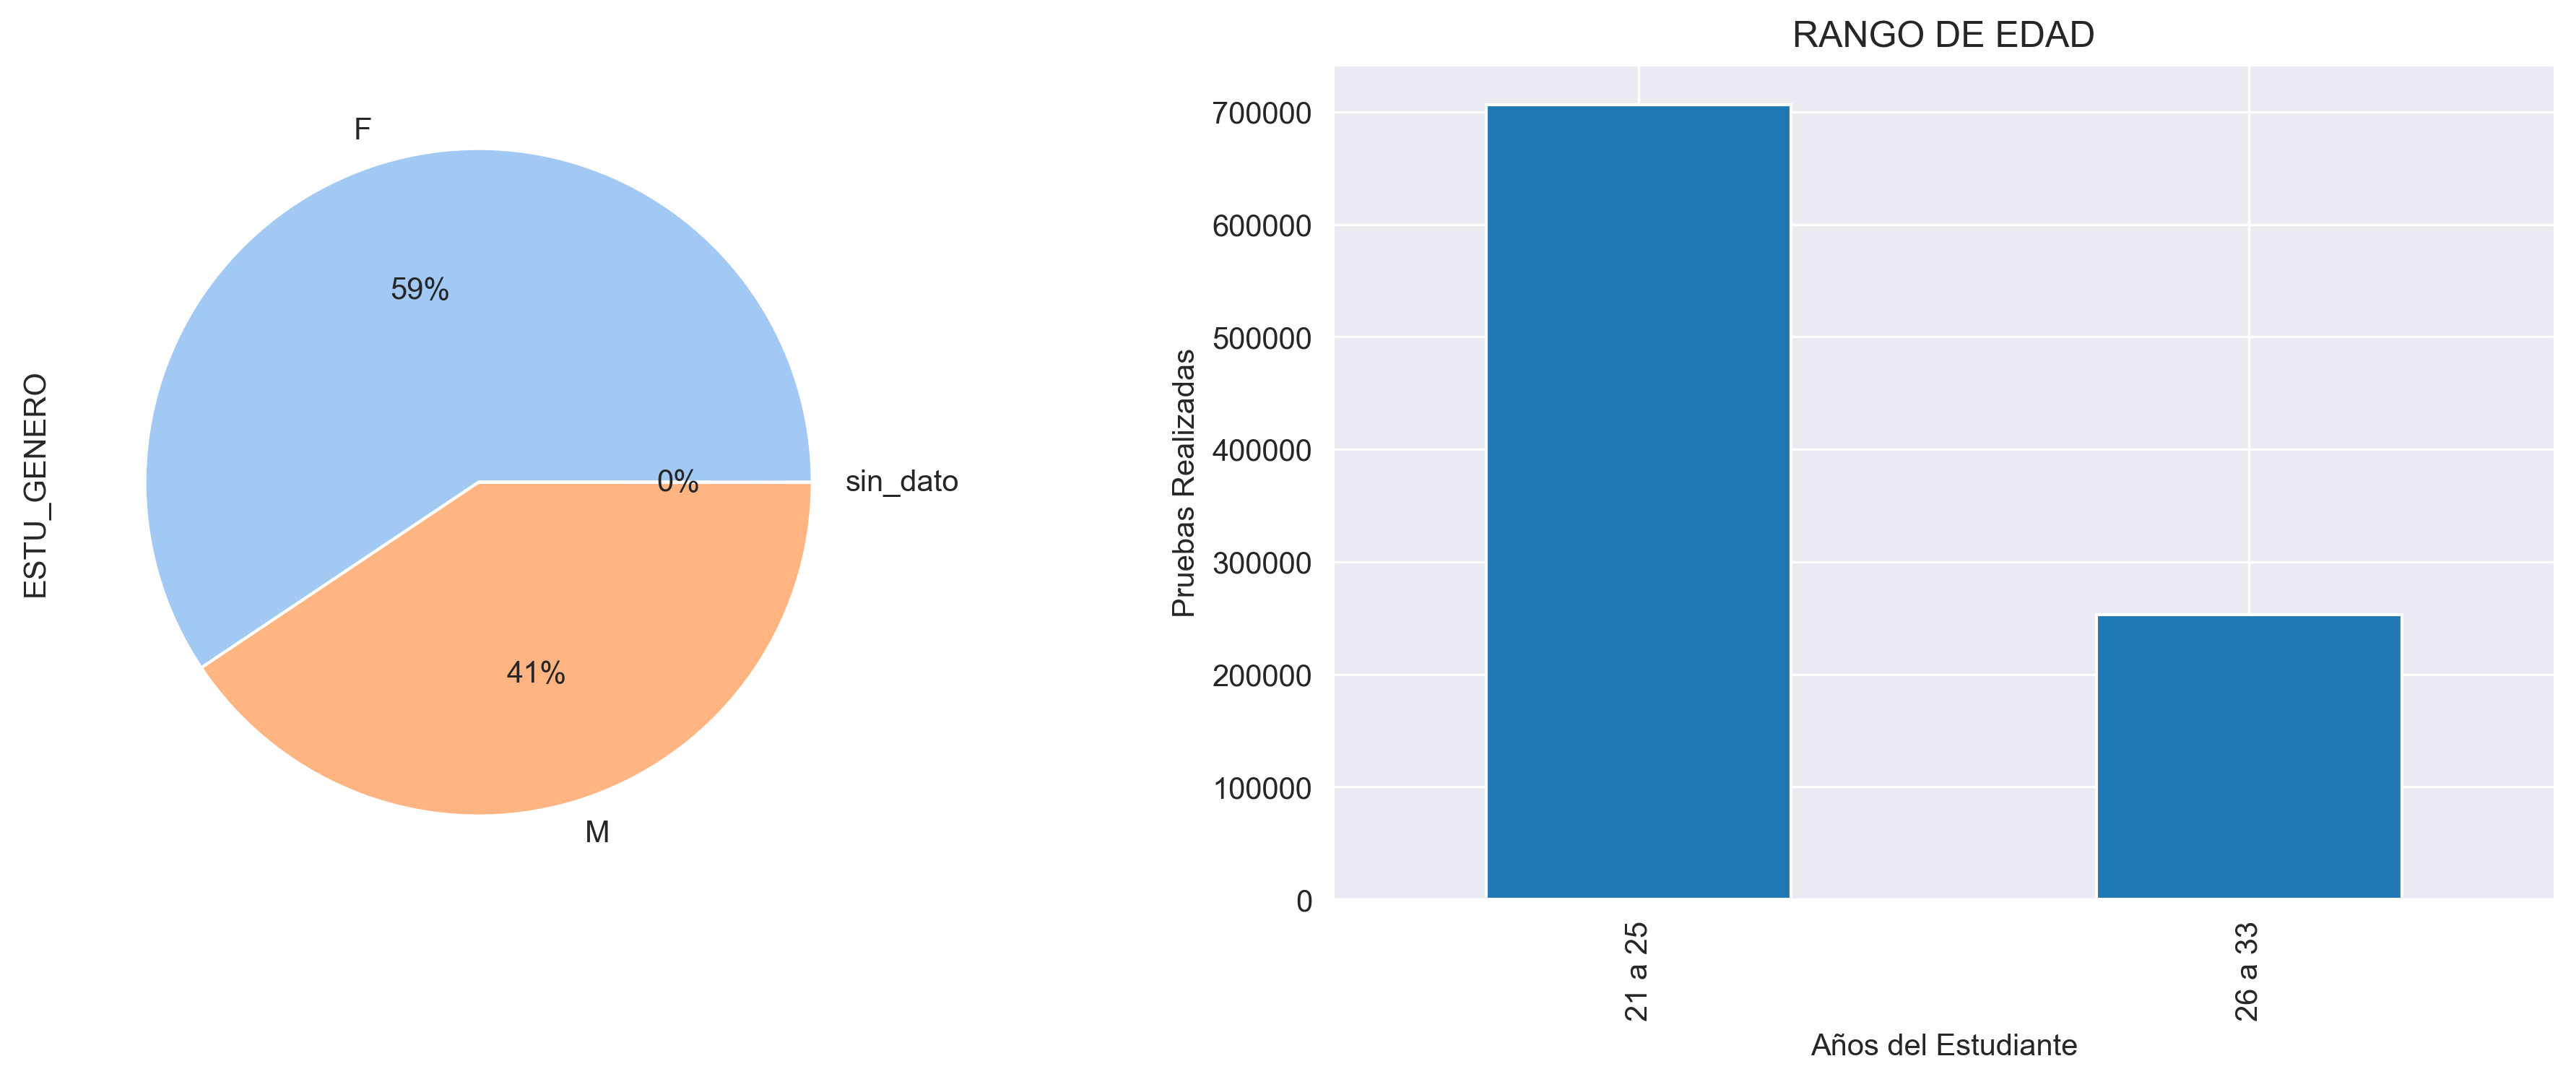

In [448]:
# Género estudiantes

f, ax = plt.subplots(nrows = 1, ncols =2, figsize = (16, 5),dpi=300)

estu_cat_graf['ESTU_EDAD'].value_counts().plot.bar().set(  title = "RANGO DE EDAD",  
xlabel="Años del Estudiante", ylabel = "Pruebas Realizadas")


estu_cat_graf['ESTU_GENERO'].value_counts().plot(ax=ax[0],kind='pie', colors=sns.color_palette('pastel'), autopct='%1.0f%%')

plt.show()

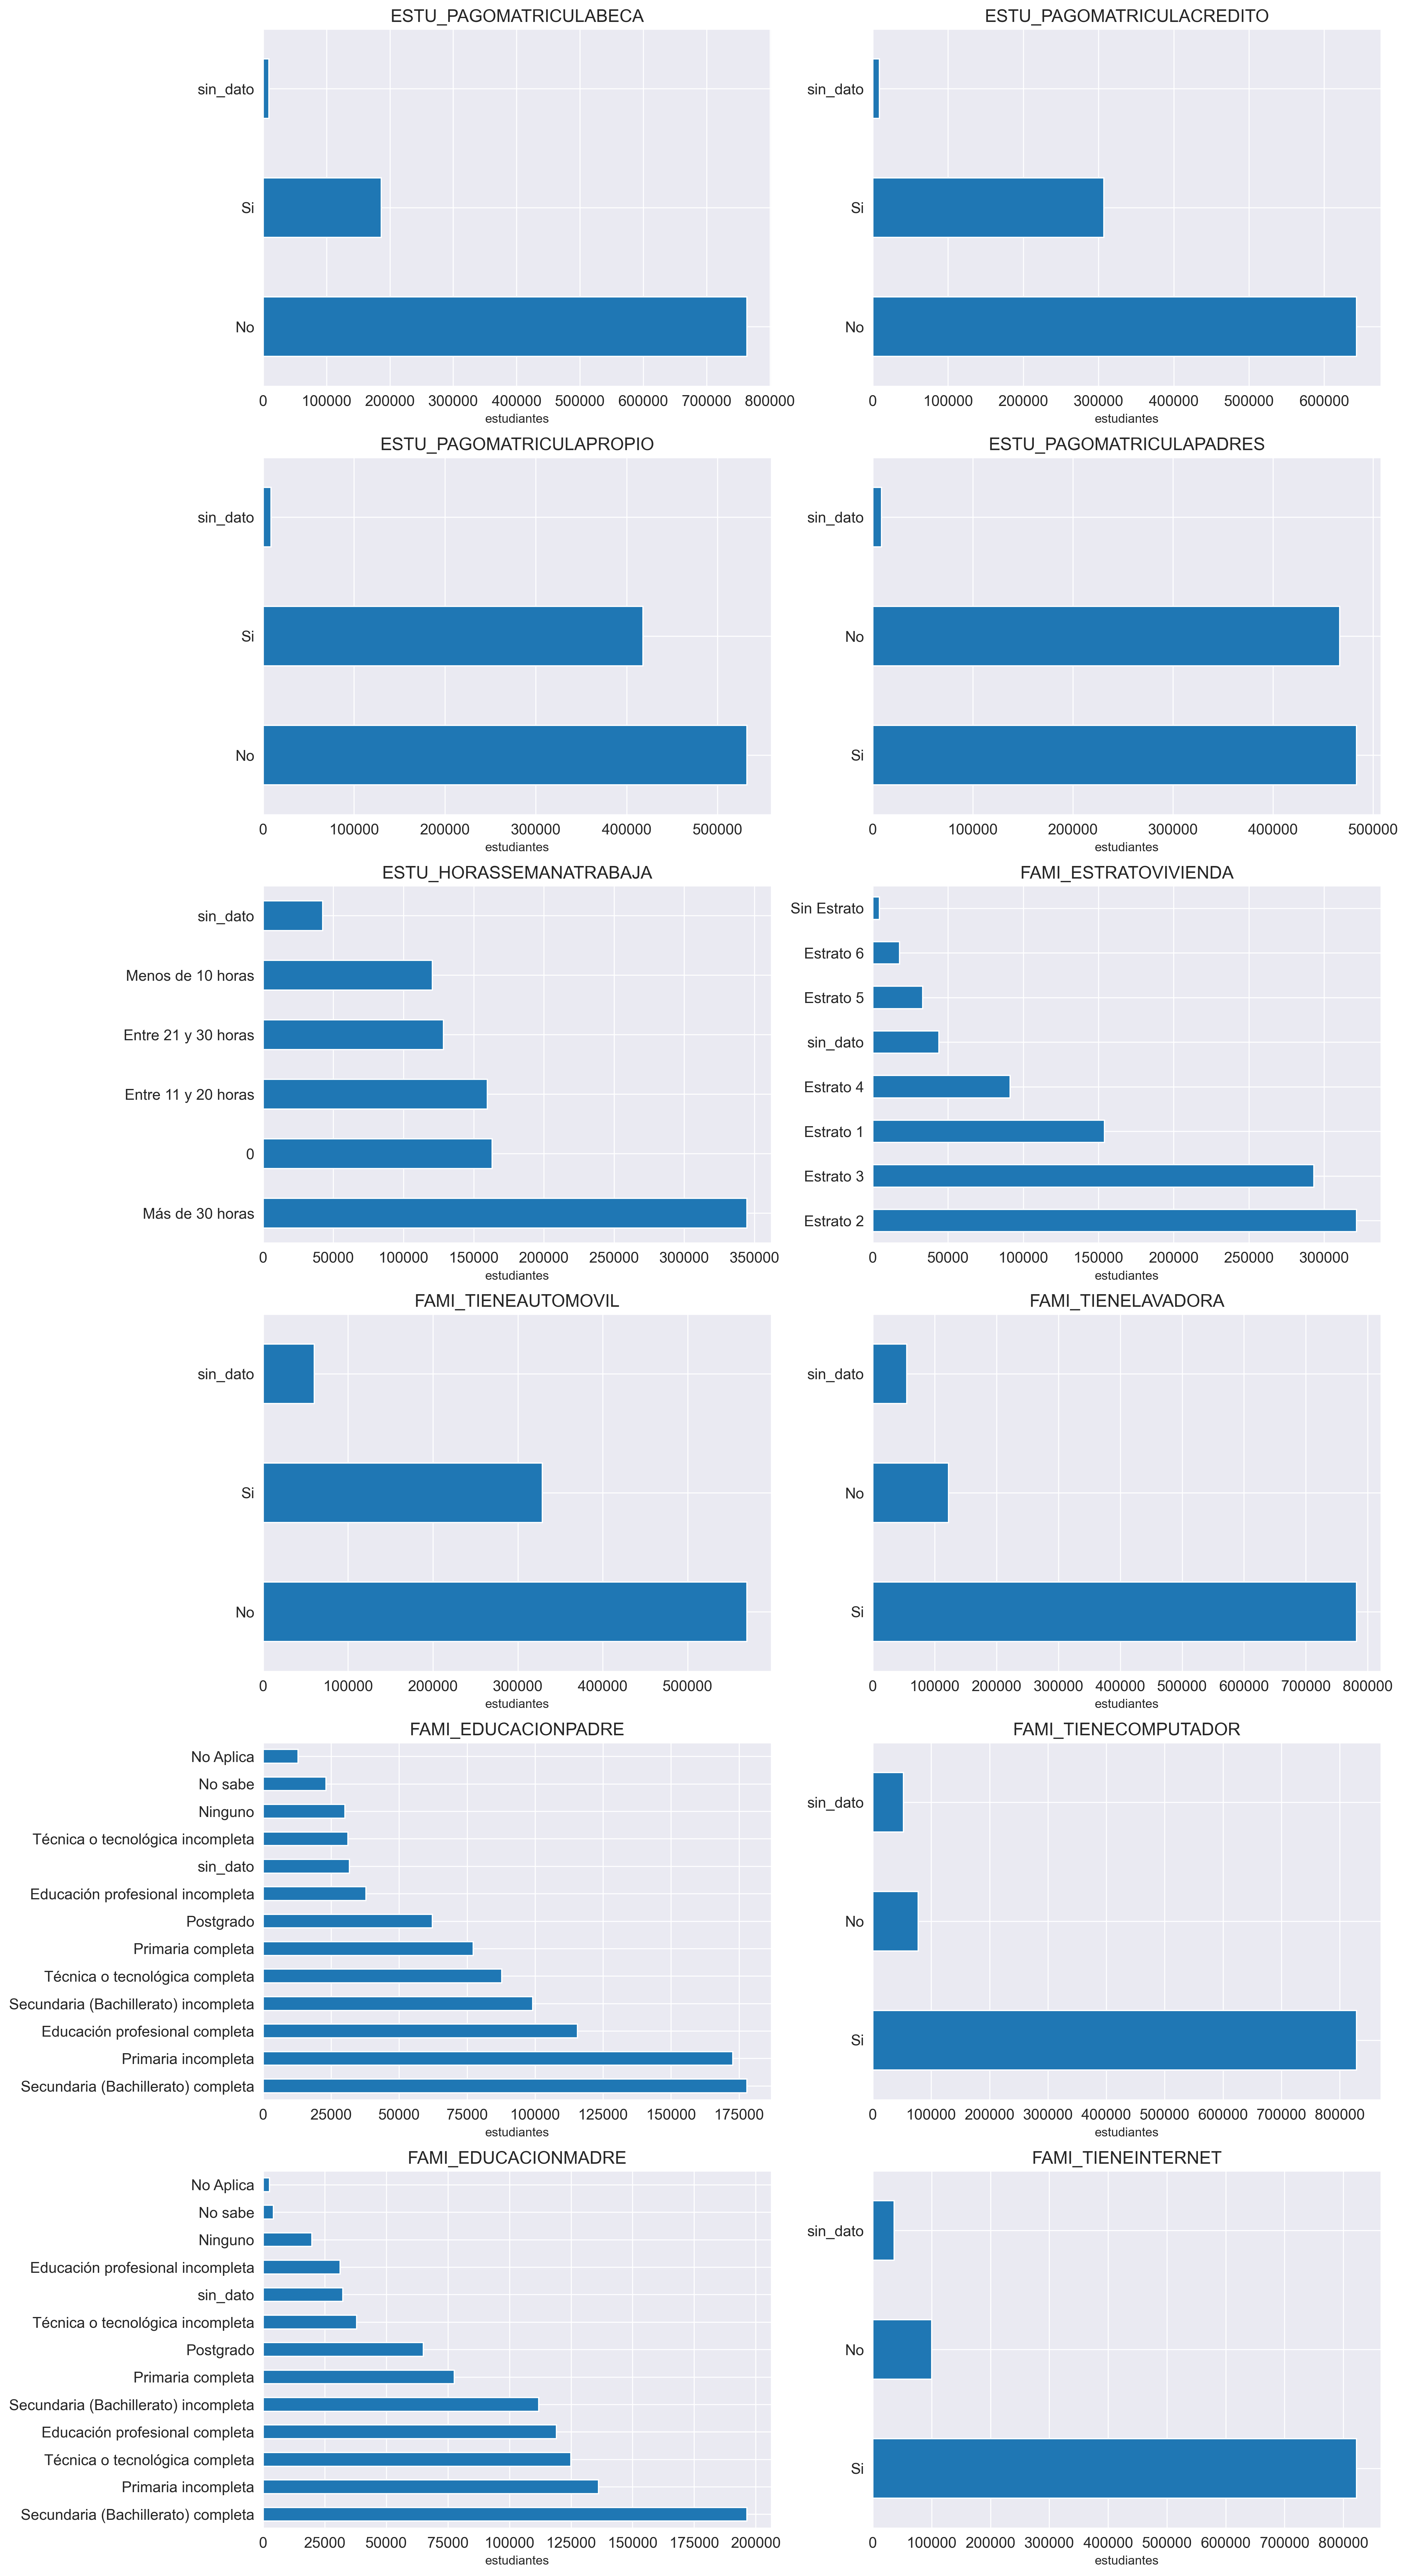

In [437]:
# Se eliminan las variables ya graficadas

estu_cat_graf= estu_cat_graf.drop(['ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_NUCLEO_PREGRADO','ESTU_PRGM_ACADEMICO',
'Id_ESTU', 'ESTU_GENERO','ESTU_EDAD'], axis=1)

# Se organiza los indices del dataframe para el grafico.

estu_cat_graf = estu_cat_graf.iloc[:,[0,1,4,3,2,8,6,7,5,9,11,10]]

def graficos_eda_cat(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6),dpi=300)

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    
    for a, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[a])
        ax[a].set_title(variable, fontsize = 14)
        ax[a].tick_params(labelsize = 12)
        ax[a].set_xlabel('estudiantes')
        
graficos_eda_cat(estu_cat_graf)        

In [447]:
# variables Númericas

estu_num_graf= estu_num

estu_num_graf=estu_num_graf.drop(['Id_MCPIO','Id_INSTITUCION'], axis=1) # Variables que no harán parte del análisis

# Se genera una nueva variable correspondiente al desempeño general DESEM_TOTAL. Es el promedio de la suma de todos los desempeños.

estu_num_graf['DESEM_TOTAL']=(estu_num_graf['MOD_COMUNI_ESCRITA_DESEM']+estu_num_graf['MOD_RAZONA_CUANTITAT_DESEM']+estu_num_graf['MOD_LECTURA_CRITICA_DESEM']+estu_num_graf['MOD_COMPETEN_CIUDADA_DESEM']+estu_num_graf['MOD_INGLES_DESEM2'])//5

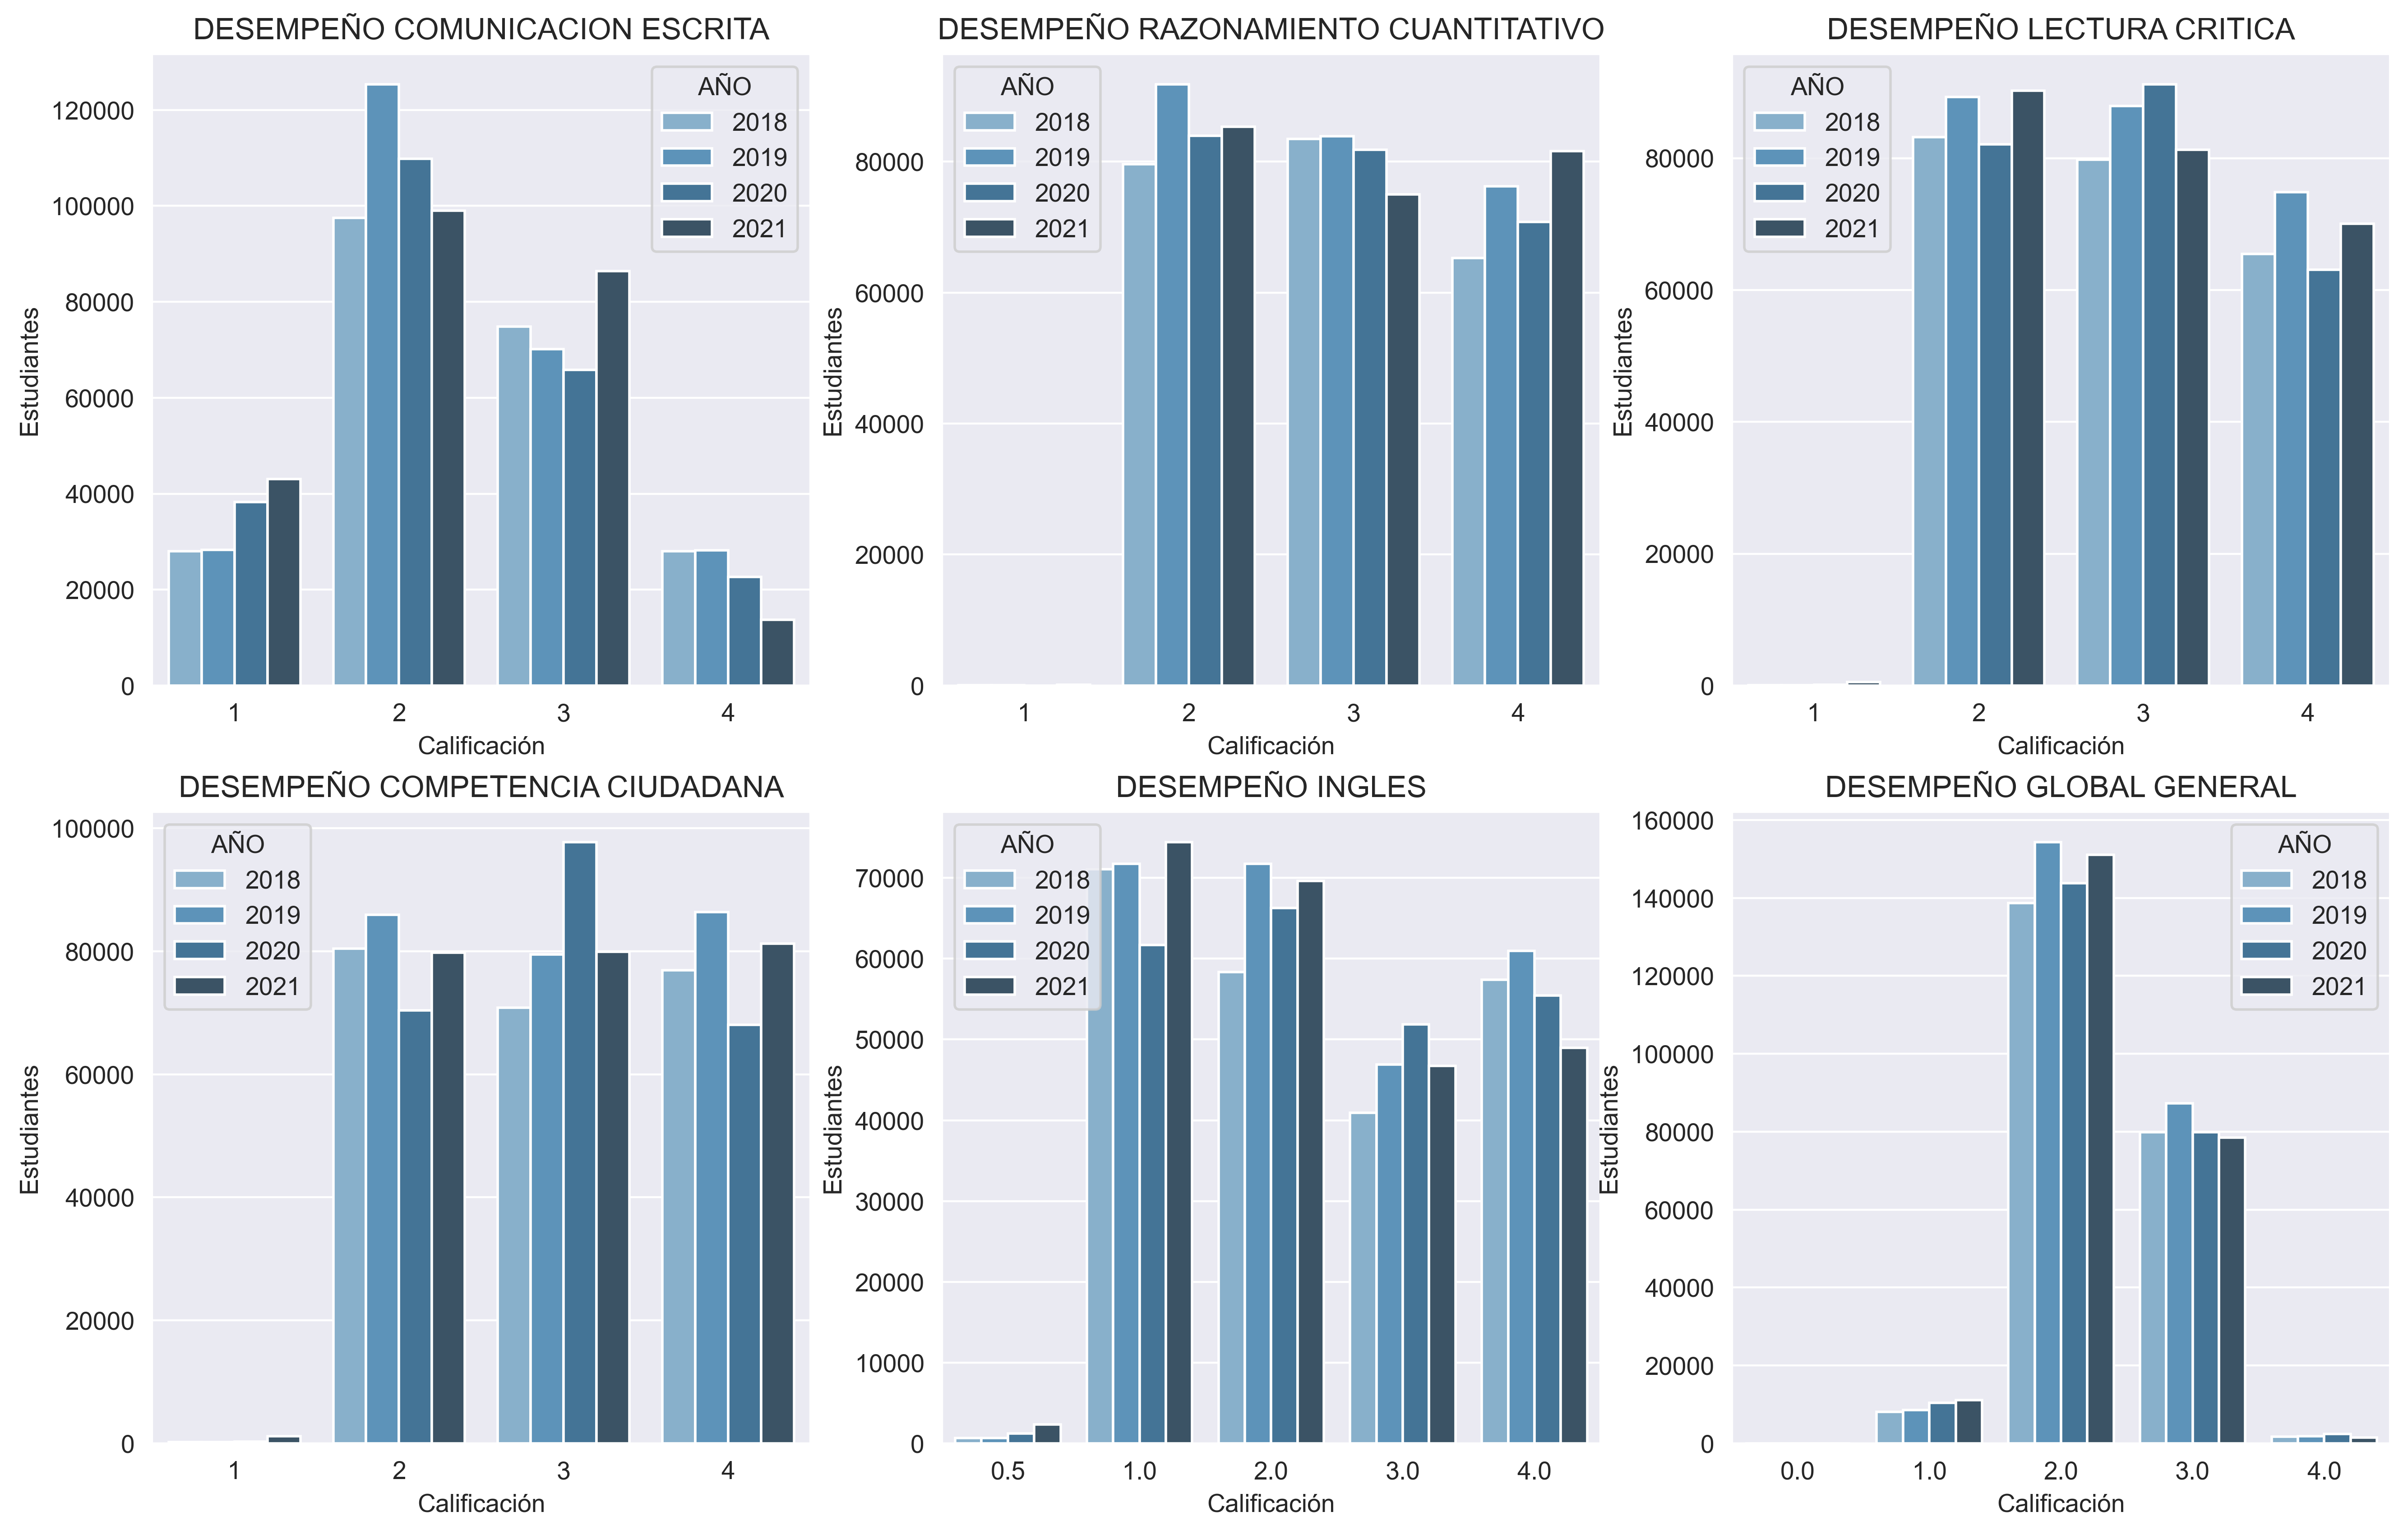

In [439]:
# Distribucón de ejes

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10),dpi=400)

# Generacioón de graficas de variables numericas

# Desempeño en las pruebas

sns.countplot( x="MOD_COMUNI_ESCRITA_DESEM",  data = estu_num_graf, hue="AÑO",  palette = "Blues_d"
, ax=ax[0,0]).set( title = "DESEMPEÑO COMUNICACION ESCRITA",  xlabel="Calificación", ylabel = "Estudiantes")

sns.countplot( x="MOD_RAZONA_CUANTITAT_DESEM",  data = estu_num_graf, palette = "Blues_d",hue="AÑO",
 ax=ax[0,1]).set( title = "DESEMPEÑO RAZONAMIENTO CUANTITATIVO", xlabel="Calificación", ylabel = "Estudiantes")


sns.countplot( x="MOD_LECTURA_CRITICA_DESEM",  data = estu_num_graf, palette = "Blues_d",hue="AÑO", 
ax=ax[0,2]).set( title = "DESEMPEÑO LECTURA CRITICA", xlabel="Calificación", ylabel = "Estudiantes")

sns.countplot( x="MOD_COMPETEN_CIUDADA_DESEM",  data = estu_num_graf, palette = "Blues_d",hue="AÑO"
, ax=ax[1,0]).set( title = "DESEMPEÑO COMPETENCIA CIUDADANA", xlabel="Calificación", ylabel = "Estudiantes")

sns.countplot( x="MOD_INGLES_DESEM2",  data = estu_num_graf, palette = "Blues_d",hue="AÑO"
, ax=ax[1,1]).set( title = "DESEMPEÑO INGLES", xlabel="Calificación", ylabel = "Estudiantes")


sns.countplot( x="DESEM_TOTAL",  data = estu_num_graf, palette = "Blues_d",hue="AÑO"
, ax=ax[1,2]).set( title = "DESEMPEÑO GLOBAL GENERAL", xlabel="Calificación", ylabel = "Estudiantes")

plt.show()

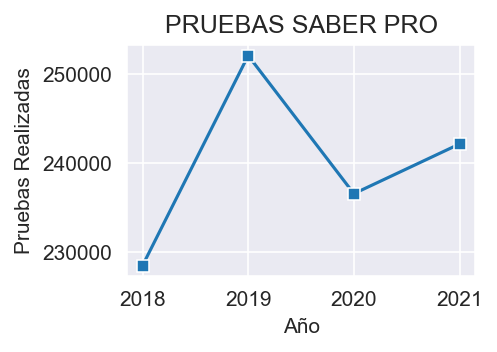

In [440]:
# Cantidad de pruebas por año

plt.figure( figsize = (3, 2), dpi=150)
sns.lineplot(data=estu_num_graf['AÑO'].value_counts(), marker="s").set( title = "PRUEBAS SABER PRO",  
xlabel="Año", ylabel = "Pruebas Realizadas")


plt.show()


## Correlación de Variables

In [443]:
# Matriz de ceros para variables categoricas

estu_cat_cor=estu_cat.drop(['ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_NUCLEO_PREGRADO','ESTU_PRGM_ACADEMICO',
'Id_ESTU'], axis=1)
estu_cat_cor

,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_HORASSEMANATRABAJA,ESTU_GENERO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,FAMI_EDUCACIONPADRE,FAMI_TIENEAUTOMOVIL,FAMI_TIENELAVADORA,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,ESTU_EDAD
0,No,No,Entre 11 y 20 horas,F,Si,No,Primaria completa,Si,Si,Estrato 2,Si,Si,Secundaria (Bachillerato) incompleta,21 a 25
1,No,No,Entre 21 y 30 horas,M,Si,No,Primaria incompleta,No,Si,Estrato 2,Si,Si,Secundaria (Bachillerato) incompleta,21 a 25
2,No,No,Más de 30 horas,M,No,Si,No Aplica,No,Si,Estrato 2,Si,Si,No sabe,21 a 25
3,No,No,0,M,Si,No,Postgrado,No,Si,Estrato 2,Si,Si,Técnica o tecnológica completa,21 a 25
4,No,No,Entre 21 y 30 horas,F,No,Si,Educación profesional completa,No,Si,Estrato 3,Si,Si,Educación profesional completa,26 a 33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991572,No,No,0,M,Si,No,Postgrado,Si,Si,Estrato 5,Si,Si,Educación profesional completa,21 a 25
991573,No,No,Menos de 10 horas,F,No,Si,Primaria completa,No,Si,Estrato 3,Si,Si,Primaria incompleta,26 a 33
991574,Si,Si,Entre 21 y 30 horas,M,Si,Si,Secundaria (Bachillerato) incompleta,No,Si,Estrato 1,No,Si,Secundaria (Bachillerato) completa,26 a 33
991575,No,No,Entre 21 y 30 horas,M,No,Si,Postgrado,Si,Si,Estrato 4,Si,Si,Educación profesional completa,26 a 33
